Exercise 1 (10 Points): Write a Python program to read the Iris dataset into a Pandas dataframe.
Perform standardization on each of the features. Draw a scatter plot (sepal length and petal length
only) of the entire dataset.


From URL: https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data


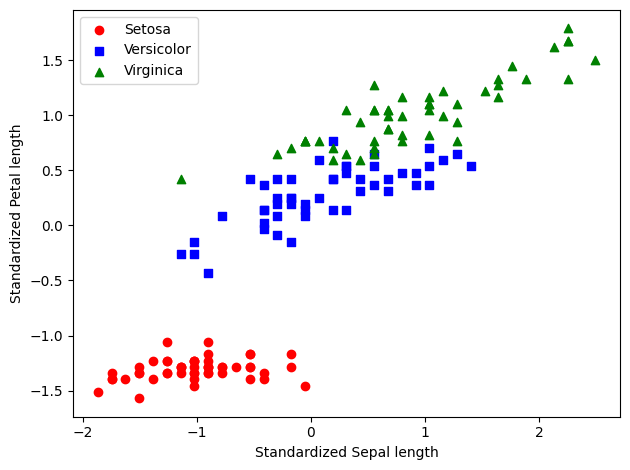

Mean after standardization:
 [-4.73695157e-16 -6.63173220e-16  3.31586610e-16 -2.84217094e-16]

Standard deviation after standardization:
 [1. 1. 1. 1.]


In [26]:
import os                                                                       #This library is used for operating system dependent functionality
import pandas as pd                                                             #This library is used for data manipulation and analysis
import matplotlib.pyplot as plt
import numpy as np

s = 'https://archive.ics.uci.edu/ml/'\
     'machine-learning-databases/iris/iris.data'                                #Defines a string 's' that contains the Iris dataset link
print('From URL:', s)

df = pd.read_csv(s,                                                             #Reads the CSV file from the URL into a DataFrame using pandas
                  header=None,                                                  #'header=None' specifies that the dataset doesn't have a header row
                  encoding='utf-8')                                             #'encoding='utf-8'' specifies the character encoding for the file


X_filtered = df.iloc[:, :-1].values
X_std = (X_filtered - X_filtered.mean(axis=0)) / X_filtered.std(axis=0)
df.iloc[:, :-1] = X_std
                                                                                #Extracting the features and labels
y = df.iloc[:, 4].values                                                        #Extracts the labels (species) from the last column of the datafram
y = np.where(y == 'Iris-setosa', 0, np.where(y == 'Iris-versicolor', 1, 2))     #Converts the string labels to numerical labels: 'Iris-setosa' to 0, 'Iris-versicolor' to 1, and 'Iris-virginica' to 2
X = df.iloc[:, [0, 2]].values                                                   #Extracts the values of the first (sepal length) and third (petal length) columns for plotting

                                                                                #Scatter plot
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',                            #Plots the data points corresponding to 'Iris-setosa' in red with 'o' markers
            marker='o', label='Setosa')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',                           #Plots the data points corresponding to 'Iris-versicolor' in blue with 's' markers
            marker='s', label='Versicolor')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green',                          #Plots the data points corresponding to 'Iris-virginica' in green with '^' markers
            marker='^', label='Virginica')
plt.xlabel('Standardized Sepal length')                                         #Labels the x-axis as 'Standardized Sepal length'
plt.ylabel('Standardized Petal length')                                         #Labels the y-axis as 'Standardized Petal length'
plt.legend(loc='upper left')                                                    #Places the legend in the upper left corner of the plot
plt.tight_layout()                                                              #Adjusts the subplots of the figure so that they fit within the figure area in a "tight" manner
plt.show()
print("Mean after standardization:\n", X_std.mean(axis=0))                      #Shows the mean after standardization
print("\nStandard deviation after standardization:\n", X_std.std(axis=0))       #Shows the standard deviation after standardization

Exercise 2 (30 Points): Use your program to train an Adaline that can be used to classify between versicolor and verginica.

• (20 Points) Try several learning rate parameters. For each learning rate parameter, plot
the empirical risk as a function of the epoch. Observe how the choice of the learning rate parameter affects the convergence and the convergence rate of the gradient descent algorithm.

• (10 Points) Pick what you believe is the best choice of the learning rate parameter. Draw
the scatter plot of the training dataset (versicolor and virginica only) and plot the decision
boundary in the same figure. Calculate the error rate of the final predictor.

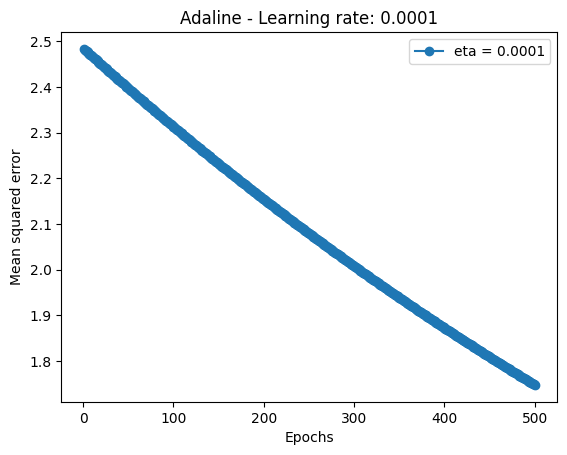

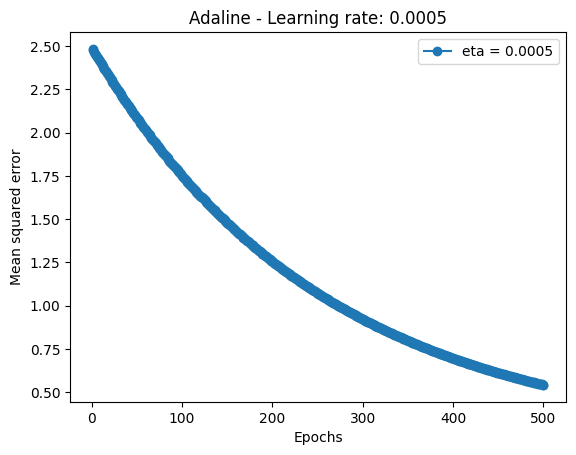

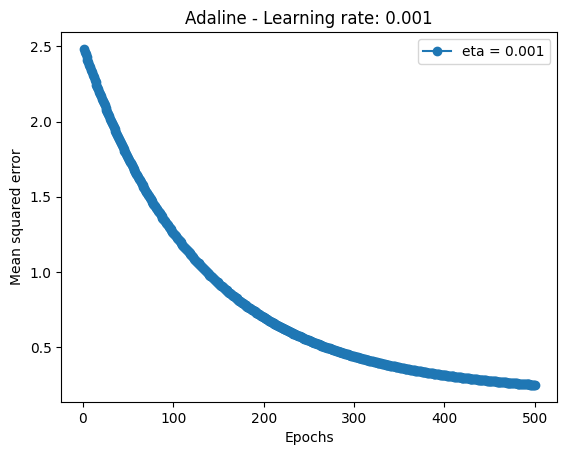

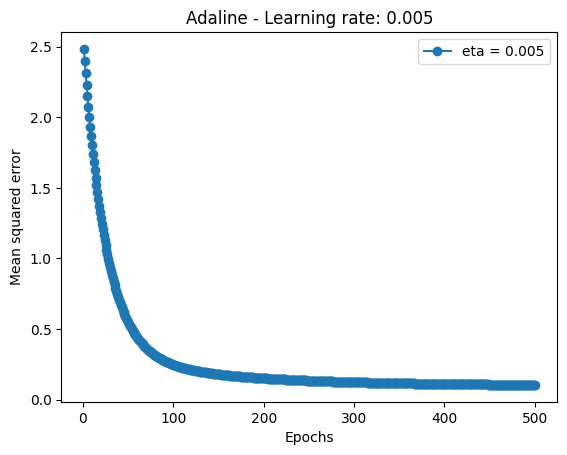

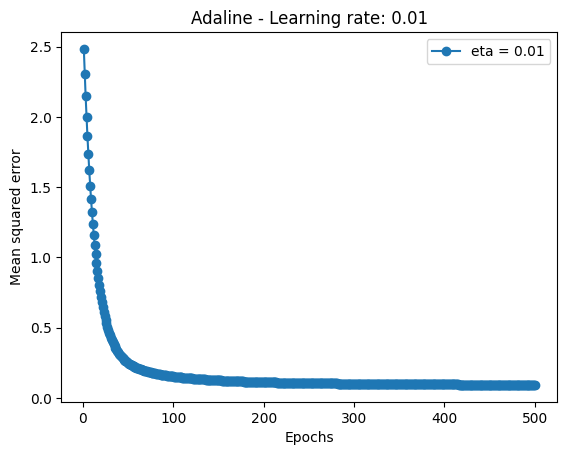

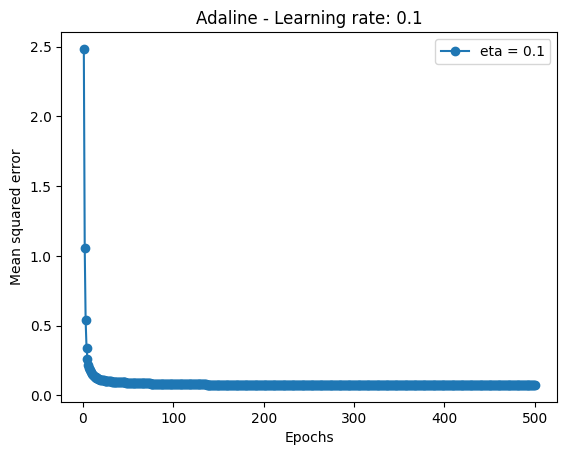

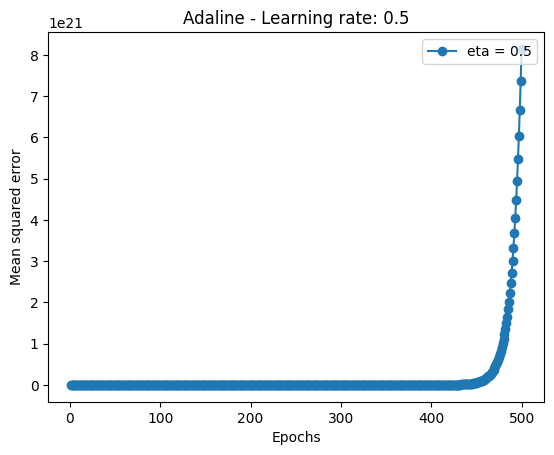

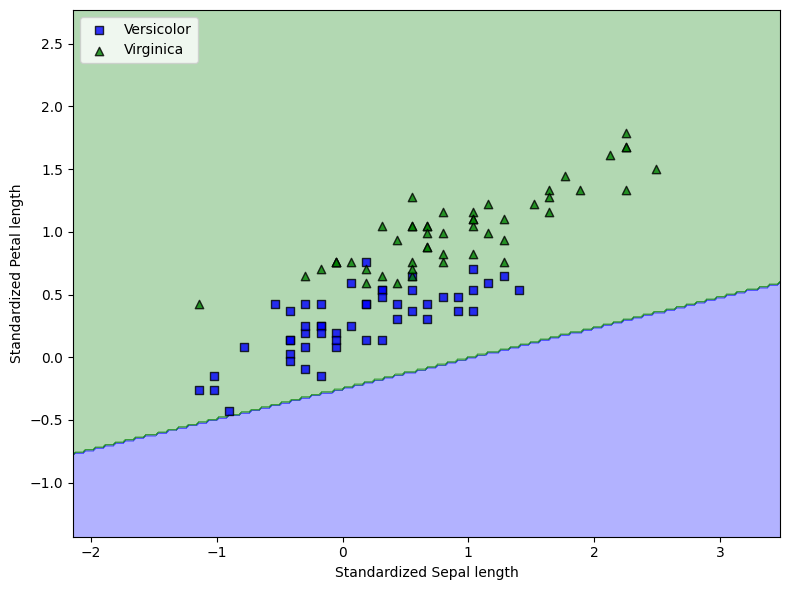

Error rate with best learning rate (0.1): 0.50


In [29]:
from matplotlib.colors import ListedColormap

                                                                                #AdalineGD class
class AdalineGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):                    #Initializes the AdalineGD class with learning rate, number of iterations, and random state
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):                                                        #Fits the training data to the model
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.float_(0.)
        self.losses_ = []

        for i in range(self.n_iter):                                            #Iteratively updates weights based on errors
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
                                                                                #Updates weights and bias using the Adaline learning rule
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
                                                                                #Calculates and store the mean squared error for this iteration
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):                                                     #Calculates net input (dot product of input and weights)
        return np.dot(X, self.w_) + self.b_

                                                                                #Activation function (identity function in case of Adaline)
    def activation(self, X):
        return X

                                                                                #Predicts class labels based on net input
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)

                                                                                #Defines the function to plot decision regions
def plot_decision_regions(X, y, classifier, resolution=0.02, plot_labels=True):
    markers = ('s', '^', 'o')                                                   #Defines markers for the plot
    colors = ('blue', 'green', 'red')                                           #Defines colors for the plot
    cmap = ListedColormap(colors[:len(np.unique(y))])
                                                                                #Defines the range for the plot
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
                                                                                #Predicts class labels for each grid point
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
                                                                                #Plots the decision boundary
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
                                                                                #Plots the data points
    flower_names = ['Setosa', 'Versicolor', 'Virginica']
    if plot_labels:
        for idx, cl in enumerate(np.unique(y)):
            plt.scatter(x=X[y == cl, 0],
                        y=X[y == cl, 1],
                        alpha=0.8,
                        c=colors[idx],
                        marker=markers[idx],
                        label=flower_names[cl],
                        edgecolor='black')

mask = (y == 1) | (y == 2)                                                      #Filtering for 'versicolor' and 'virginica'
X_filtered = X[mask]
y_filtered = y[mask]

                                                                                #Trains Adaline for different learning rates and plot empirical risk
etas = [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1, 0.5]
n_epochs = 500
all_costs = []

for eta in etas:
    adaline = AdalineGD(eta=eta, n_iter=n_epochs)
    adaline.fit(X_filtered, y_filtered)
    all_costs.append(adaline.losses_)
    plt.plot(range(1, len(adaline.losses_) + 1), adaline.losses_,
             label=f'eta = {eta}', marker='o')
    plt.xlabel('Epochs')
    plt.ylabel('Mean squared error')
    plt.legend(loc='upper right')
    plt.title(f'Adaline - Learning rate: {eta}')
    plt.show()

best_eta = etas[np.argmin([cost[-1] for cost in all_costs])]

adaline = AdalineGD(eta=best_eta, n_iter=n_epochs)
adaline.fit(X_filtered, y_filtered)

plt.figure(figsize=(8, 6))
plot_decision_regions(X_filtered, y_filtered, classifier=adaline)
plt.xlabel('Standardized Sepal length')
plt.ylabel('Standardized Petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

predictions = adaline.predict(X_filtered)
error_rate = np.mean(predictions != y_filtered)
print(f"Error rate with best learning rate ({best_eta}): {error_rate:.2f}")


Exercise 3 (30 Points): Use your program to implement the all-pair scheme for classifying all three classes in the Iris dataset. Draw the scatter plot of the entire dataset and plot the decision boundary of the final multi-class classifier in the same figure. Calculate the error rate of the multi-
class classifier.

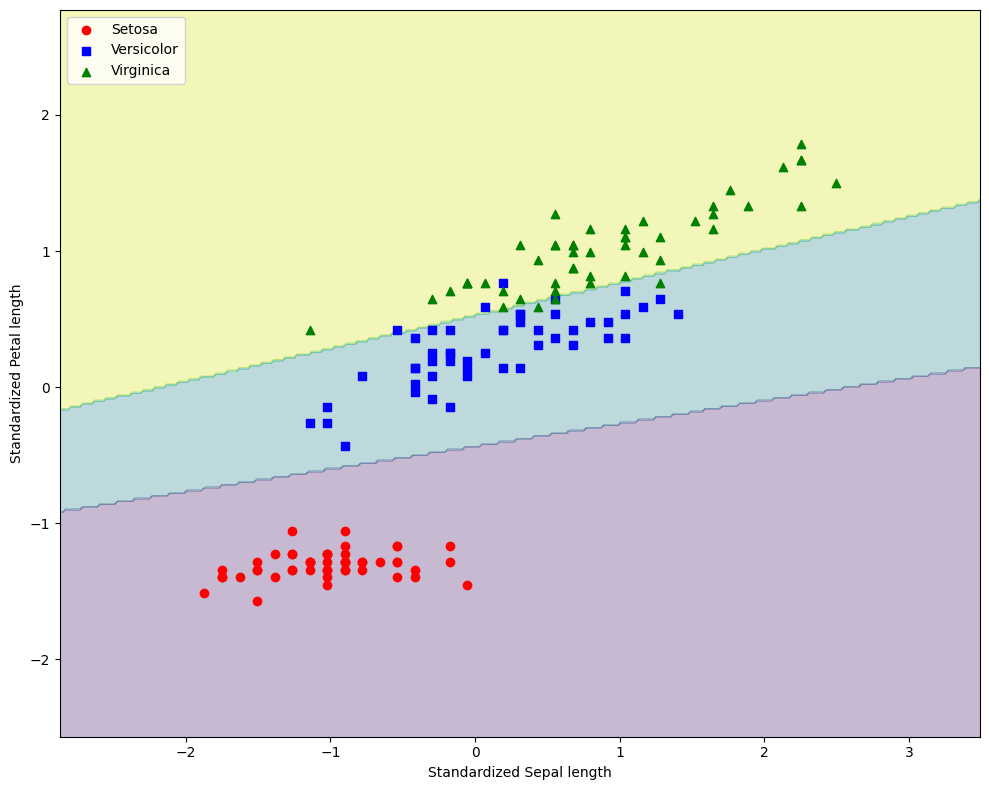

Error rate of the multi-class classifier: 0.04


In [19]:
y_all = df.iloc[:, 4].values                                                    #Extracts the labels (species) from the 5th column of the dataframe
y_all_encoded = np.where(y_all == 'Iris-setosa',                                #Encodes the species labels as numbers: 'Iris-setosa' as 0, 'Iris-versicolor' as 1, and 'Iris-virginica' as 2
                         0, np.where(y_all == 'Iris-versicolor', 1, 2))
X_all = df.iloc[:, [0, 2]].values                                               #Extracts the features from the 1st and 3rd columns of the dataframe


X_all_std = X_all                                                               #Getting standardized data

                                                                                #Train Adaline classifiers for each pair
pairs = [(0, 1), (0, 2), (1, 2)]                                                #Defines the pairs of classes for the all-pairs approach
classifiers = []                                                                #Lists to store the trained classifiers for each pair

for pair in pairs:                                                              #Trains a classifier for each pair of classes
    y_pair = np.where(y_all_encoded == pair[0], 0,                              #Creates binary labels for the current pair of classes
                      np.where(y_all_encoded == pair[1], 1, -1))
                                                                                #Filters out data points that don't belong to the current pair of classes
    mask = y_pair != -1
    X_pair = X_all_std[mask]
    y_pair = y_pair[mask]
                                                                                #Initializes and train the Adaline classifier for the current pair
    adaline = AdalineGD(eta=best_eta, n_iter=n_epochs)
    adaline.fit(X_pair, y_pair)

    classifiers.append(adaline)                                                 #Stores the trained classifier

                                                                                #Creates a mesh grid for plotting decision boundaries
x1_min, x1_max = X_all_std[:, 0].min() - 1, X_all_std[:, 0].max() + 1
x2_min, x2_max = X_all_std[:, 1].min() - 1, X_all_std[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02),
                       np.arange(x2_min, x2_max, 0.02))

mesh_votes = np.zeros((xx1.ravel().shape[0], 3))                                #Initializes an array to store votes for each class for each point in the mesh grid
for idx, pair in enumerate(pairs):                                              #For each classifier, predict the class for each point in the mesh grid
    mesh_predictions = classifiers[idx].predict(np.array([xx1.ravel(),
                                                          xx2.ravel()]).T)
    mesh_votes[mesh_predictions == 0, pair[0]] += 1                             #Updates the votes based on the predictions
    mesh_votes[mesh_predictions == 1, pair[1]] += 1

                                                                                #Determines the class with the most votes for each point in the mesh grid
Z = np.argmax(mesh_votes, axis=1)
Z = Z.reshape(xx1.shape)

                                                                                #Plots decision boundaries
plt.figure(figsize=(10, 8))
plt.contourf(xx1, xx2, Z, alpha=0.3)
plt.scatter(X_all_std[y_all_encoded == 0, 0], X_all_std[y_all_encoded == 0, 1],
            color='red', marker='o', label='Setosa')
plt.scatter(X_all_std[y_all_encoded == 1, 0], X_all_std[y_all_encoded == 1, 1],
            color='blue', marker='s', label='Versicolor')
plt.scatter(X_all_std[y_all_encoded == 2, 0], X_all_std[y_all_encoded == 2, 1],
            color='green', marker='^', label='Virginica')
plt.xlabel('Standardized Sepal length')
plt.ylabel('Standardized Petal length')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

votes = np.zeros((X_all_std.shape[0], 3))                                       #Initializes an array to store votes for each class for each data point
for idx, pair in enumerate(pairs):                                              #For each classifier, predict the class for each data point
    predictions = classifiers[idx].predict(X_all_std)
                                                                                #Updates the votes based on the predictions
    votes[predictions == 0, pair[0]] += 1
    votes[predictions == 1, pair[1]] += 1

y_pred = np.argmax(votes, axis=1)                                               #Determines the predicted class for each data point based on the most votes
error_rate = np.mean(y_pred != y_all_encoded)                                   #Calculates the error rate
print(f"Error rate of the multi-class classifier: {error_rate:.2f}")            #Prints the error rate


Exercise 4 (30 Points): Use your program to implement the one-vs-all scheme for classifying all three classes in the Iris dataset. Draw the scatter plot of the entire dataset and plot the decision boundary of the final multi-class classifier in the same figure. Calculate the error rate of the
multi-class classifier. How do you compare the performance the one-vs-all scheme with that of the all-pairs approach from the previous exercise, and how do you explain the comparison?

Error rate of the one-vs-all classifier with one-hot encoding: 0.21


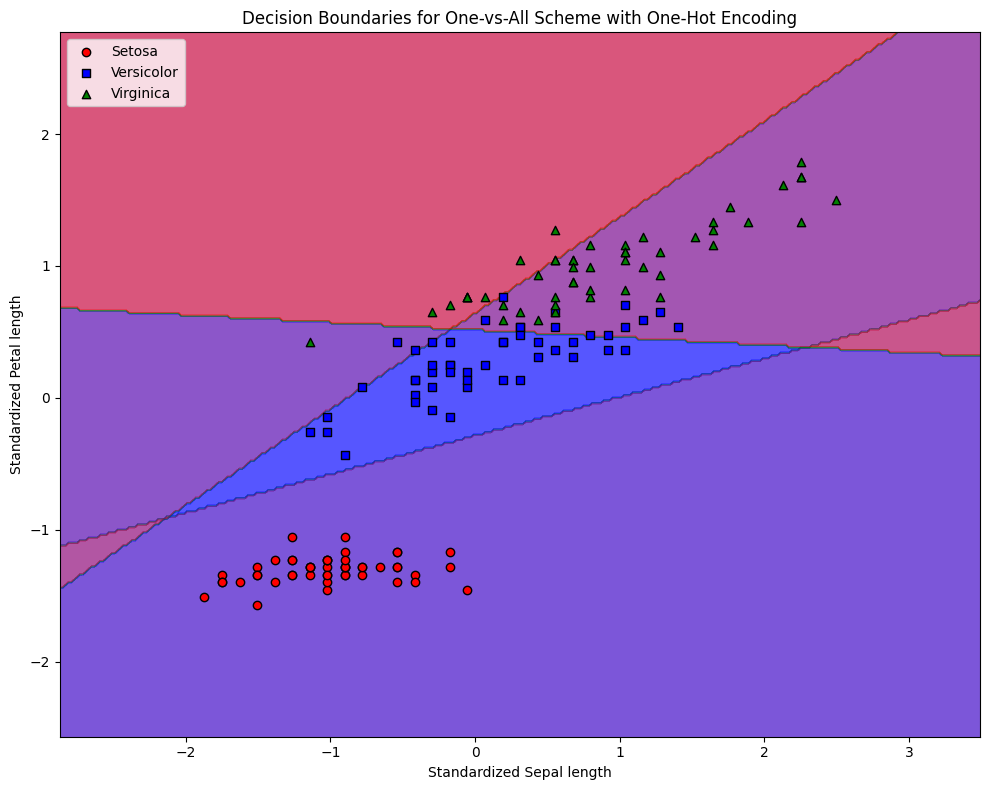

In [20]:
                                                                                #One-vs-All Training with One-Hot Encoding
def train_one_vs_all(X, y, eta, n_iter):
    classifiers = []                                                            #Lists to store the trained classifiers
    one_hot = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])                       #Defines one-hot encoding for the three classes: setosa, versicolor, and virginica
    for idx, label in enumerate([0, 1, 2]):                                     #Trains a classifier for each class
        y_one_hot = one_hot[y]                                                  #Converts the labels to one-hot encoding
        y_binary = y_one_hot[:, idx]                                            #Extracts the binary labels for the current class
        adaline = AdalineGD(eta=eta, n_iter=n_iter)                             #Initializes and train the Adaline classifier for the current class
        adaline.fit(X, y_binary)
        classifiers.append(adaline)                                             #Stores the trained classifier
    return classifiers                                                          #Returns the list of trained classifiers

                                                                                #Defines a function to predict the class using the one-vs-all scheme with one-hot encoding
def predict_one_vs_all(X, classifiers):
    outputs = np.array([classifier.net_input(X) for classifier in classifiers]).T #Calculates the net input for each classifier and store the results
    return np.argmax(outputs, axis=1)                                           #Determines the class with the highest net input for each data point

classifiers_one_vs_all = train_one_vs_all(X, y, best_eta, n_epochs)             #Training classifiers
y_pred_one_vs_all = predict_one_vs_all(X, classifiers_one_vs_all)               #Predicting
error_rate_one_vs_all = np.mean(y_pred_one_vs_all != y)                         #Calculating error rate
print(f"Error rate of the one-vs-all classifier with one-hot encoding: {error_rate_one_vs_all:.2f}")

                                                                                #Plotting decision boundaries and scatter plot on a single graph
plt.figure(figsize=(10, 8))
for classifier in classifiers_one_vs_all:                                       #Plots the decision boundaries for each classifier
    plot_decision_regions(X, y, classifier, plot_labels=False)
                                                                                #Plots the data points for each class
plt.scatter(X[y == 0, 0], X[y == 0, 1], color='red',
            marker='o', label='Setosa', edgecolor='black')
plt.scatter(X[y == 1, 0], X[y == 1, 1], color='blue',
            marker='s', label='Versicolor', edgecolor='black')
plt.scatter(X[y == 2, 0], X[y == 2, 1], color='green',
            marker='^', label='Virginica', edgecolor='black')
                                                                                #Sets the labels and title for the plot
plt.xlabel('Standardized Sepal length')
plt.ylabel('Standardized Petal length')
plt.legend(loc='upper left')
plt.title('Decision Boundaries for One-vs-All Scheme with One-Hot Encoding')
plt.tight_layout()
plt.show()


As we can see from the results, all-pair scheme performed better than all-vs-one method. It could be due to all-pair schemes ability to capture the nuances between pairs of classes. By training a classifier for each pair, it can better distinguish between those specific classes. The one-vs-all scheme, on the other hand, tries to distinguish one class from all others which might lead to a more generalized decision boundary